<a href="https://colab.research.google.com/github/viridis45/Python-data-analysis/blob/master/08142019_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
# nah imma do it by hand

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# lil bit of EDA

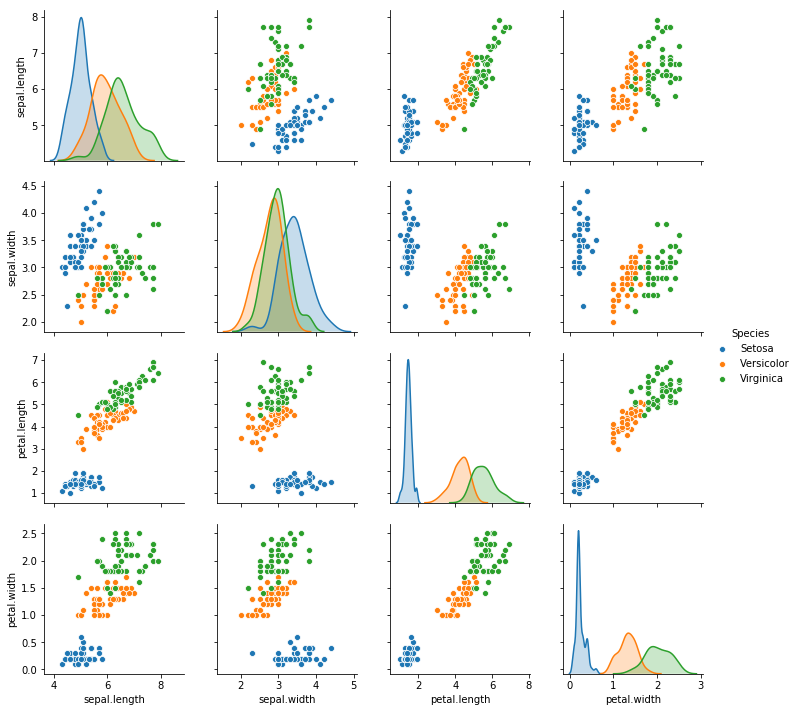

In [0]:
import seaborn as sns
setosa = '/content/drive/My Drive/T4IR/colab/0812data/iris.csv'
data = pd.read_csv(setosa)
sns.pairplot(data, hue='Species')

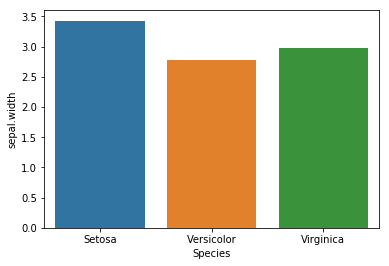

In [0]:
sns.barplot(data['Species'], data['sepal.width'], ci=None)

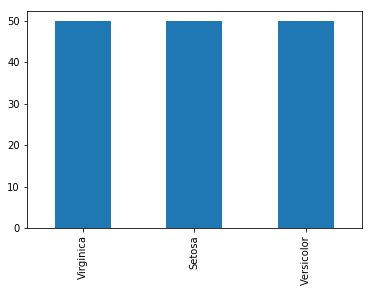

In [0]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

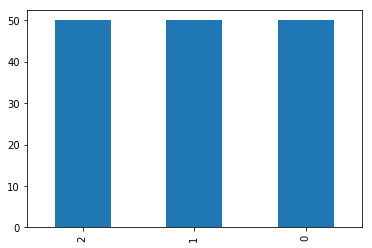

In [0]:
import numpy as np
data = pd.read_csv(setosa)
data['Species'] = data['Species'].replace(data['Species'].unique(), np.arange(0,len(data['Species'].unique()),1)) # or use map. except this seemed fun atm
data['Species'].value_counts().plot(kind='bar')

# splitting data

In [0]:
# spliting data and label
data.columns[:-1]
datax = data[ data.columns[:-1]].values
datay = data[ data.columns[-1]].values


from sklearn.model_selection import train_test_split as tts
(xtrain, xtest, ytrain, ytest) = tts(datax, datay, test_size = 0.2)
xtrain 

# this needs to be one-hot-encoded.

from keras.utils import np_utils
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
ytest[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

# summoning keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

model = Sequential()
model.add(Dense (3, input_dim=4, activation='softmax'))

sgd = optimizers.SGD(lr = 0.01) #학습률
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=1, epochs = 200, validation_data = (xtest, ytest))



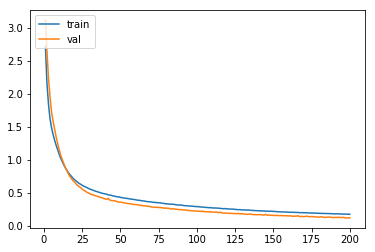

In [0]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

plt.legend(['train','val'], loc='upper left')
plt.show()

In [0]:
print ('test accuracy : %.4f' %(model.evaluate(xtest, ytest)[1]) )

30/30 [==============================] - 0s 55us/step
test accuracy : 1.0000


In [0]:
# 계단함수 // threshold 전후로 1 or 0
# 인공신경망 생성 시 은닉층에 활셩화함수로 선형함수 사용 불가. 왜그렇게?
# weight의 중복합산 y'(x) == f(f(f(x))) == w*w*w*x 이므로


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import optimizers

# adding layers onto the model 
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu', init='uniform'))
model.add(Dense(8, activation='relu')) # this '8' represents the output.
model.add(Dense(3, activation='softmax'))


# random normal ~ gaussian, uniform ~범위를 구간으로 나누고, 각각의 구간에서 균등하게 난수 생성
# 손실함수로는 mse, ce


model.fit(xtrain, ytrain, batch_size=len(xtrain))
# 배치경사하강법 : 1에폭에 모든 매개변수 업데이트를 한번 수행

model.fit(xtrain, ytrain, match_size=1)
# sgd 확률적 경사 하강법

keras.optimizers.SGD(lr = 0.01, momentum=0.9)
# https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1


# preventing overfitting
# 1. 훈련 조기종료 via epochs limit
# 2. dropout 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  


RuntimeError: ignored

In [0]:

from keras.preprocessing.text import Tokenizer
t = Tokenizer()
fitText = 'the earth is an awesome place to live'
t.fit_on_texts([fitText])
print(t.word_index)

test = 'the earth is an place to live'
t.texts_to_sequences([test])




{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'to': 7, 'live': 8}


[[1, 2, 3, 4, 6, 7, 8]]

In [0]:
from keras.preprocessing.sequence import pad_sequences
pad_sequences([[10,20,30], [40,50], [60,70,80,90]], maxlen=5, padding='post')


array([[10, 20, 30,  0,  0],
       [40, 50,  0,  0,  0],
       [60, 70, 80, 90,  0]], dtype=int32)

In [0]:
# 밀집벡터로 구현하기 --- embedding
# 각 항목을 2차원 plain에 배열
# ? regardless to the axis identity ???????/
# ex)
# model = Sequential()
# model.add(Embedding(voc, size, length))

## saving model outline

In [0]:
# how to save a model in tf:

import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = w*x + b
cost = tf.reduce_mean((hf-y)**2)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
feed = {x:xdata, y:ydata}

saver = tf.train.Saver()
for i in range(2001):
  sess.run(train, feed_dict=feed)
  if i%100 ==0:
    print(i, sess.run(cost, feed_dict=feed))
    
saver.save(sess, 'Model/example')

0 0.14428344
100 0.0008048229
200 6.196788e-06
300 4.772248e-08
400 3.6874326e-10
500 2.93691e-12
600 9.473903e-14
700 0.0
800 0.0
900 0.0
1000 0.0
1100 0.0
1200 0.0
1300 0.0
1400 0.0
1500 0.0
1600 0.0
1700 0.0
1800 0.0
1900 0.0
2000 0.0


'Model/example'

## keras outline 1

In [0]:
# how to save a model in tf:

import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = w*x + b
cost = tf.reduce_mean((hf-y)**2)

train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
saver = tf.train.Saver()
latest = tf.train.latest_checkpoint('Model')

print(latest)
saver.restore(sess,latest)

print(sess.run(hf, feed_dict={x:[5,7]}))

## keras outline 2

In [0]:
from keras.layers import Input, Dense
from keras.models import Model


inputs = Input(shape=(10,))
h1 = Dense(64, activation = 'relu')(inputs)
h2 = Dense(64, activation = 'relu')(h1)

output = Dense(1, activation = 'sigmoid')(h2)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(INPUTDATA, LABEL)
